In [385]:
#!/usr/bin/env python3
"""

"""

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
__author__ = 'Tyler Coltrain'
__version__ = 'Fall 2022'
__pylint__ = ''

In [386]:
"""
Part 1 
Problem statement. Describe the dataset, analyze the target variable, and state your prediction goal.

IBM HR Analytics Employee Attrition & Performance. 
target variable: Attrition - did they quit 
Goal: binary classification model classify data into quitting vs staying

https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition?resource=download

Some data is already numeric for categorical
Education - 1 = below college, 2 = college, 3 = bachelor, 4 = master, 5 = doctor
EnvironmentSatisfaction - 1 = low, 2 = medium, 3 = high, 4 = very high
JobInvolvement - 1 = low, 2 = medium, 3 = high, 4 = very high
JobSatisfaction - 1 = low, 2 = medium, 3 = high, 4 = very high
PerformanceRating - 1 = low, 2 = good, 3 = excellent, 4 = outstanding
RelationshipSatisfaction - 1 = low, 2 = medium, 3 = high, 4 = very high
WorkLifeBalance - 1 = bad, 2 = good, 3 = better, 4 = best
"""

original_df = pd.read_csv('HR Employee Attrition.csv')
#checking data
original_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [387]:
#checking rows and colulmns
print(original_df.shape)
#checking balance
original_df['Attrition'].groupby(original_df['Attrition']).value_counts()

(1470, 35)


Attrition  Attrition
No         No           1233
Yes        Yes           237
Name: Attrition, dtype: int64

In [388]:
#checking datatypes and any null values
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [389]:
#checking number of unique values
original_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [390]:
"""
Part 2
Basic data cleaning.  
Drop unwanted features.  
Address missing values.  
Remove Duplicates. 
Check if there are any inconsistent inputs for categorical variables. 
Transform categorical variables into numeric. 
Use boxplots or histogram to identify outliers for numeric variables and remove them.

"""
#checking category rows for incorrect/inconsistent inputs
print(original_df['Attrition'].unique())
print(original_df['BusinessTravel'].unique())
print(original_df['Department'].unique())
print(original_df['EmployeeCount'].unique())
print(original_df['EducationField'].unique())
print(original_df['Gender'].unique())
print(original_df['JobRole'].unique())
print(original_df['MaritalStatus'].unique())
print(original_df['Over18'].unique())
print(original_df['OverTime'].unique())
print(original_df['PerformanceRating'].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
[1]
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']
[3 4]


In [391]:
#droping EmployeeCount and Over18 because only 1 value and irrelevant 
original_df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours'], inplace = True)

In [392]:
#dropping EmployeeNumber as its irrelevant
original_df.drop(columns = ['EmployeeNumber'], inplace = True)

In [393]:
#dropping PerformanceRating as irrelevant because should be scale 1-5 but only giving 3s and 4s
original_df.drop(columns = ['PerformanceRating'], inplace = True)

In [394]:
#dropping duplicates if any
original_df.drop_duplicates(keep = 'first', inplace = True)

In [395]:
#changing categorical to numeric for target attrition 1 = yes 0 = no
original_df['Attrition'].replace('Yes', 1, inplace = True)
original_df['Attrition'].replace('No', 0, inplace = True)

In [396]:
#changing categorical to numeric for 'BusinessTravel'
replace_to = [1,2,3]
replace = ['Non-Travel','Travel_Rarely','Travel_Frequently']
original_df['BusinessTravel'].replace(replace, replace_to, inplace=True)

In [397]:
#changing categorical to numeric for 'Department'
replace = ['Sales', 'Research & Development', 'Human Resources']
replace_to = [1,2,3]
original_df['Department'].replace(replace, replace_to, inplace=True)

In [398]:
#changing categorical to numeric for 'EducationField'
replace = ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree',
 'Human Resources']
replace_to = [1,2,3,4,5,6]
original_df['EducationField'].replace(replace, replace_to, inplace=True)

In [399]:
#changing categorical to numeric for 'Gender'
replace = ['Female','Male']
replace_to = [0,1]
original_df['Gender'].replace(replace, replace_to, inplace=True)

In [400]:
#changing categorical to numeric for 'JobRole'
replace = ['Sales Executive', 'Research Scientist', 'Laboratory Technician',
 'Manufacturing Director', 'Healthcare Representative', 'Manager',
 'Sales Representative', 'Research Director', 'Human Resources']
replace_to = [1,2,3,4,5,6,7,8,9]
original_df['JobRole'].replace(replace, replace_to, inplace=True)

In [401]:
#changing categorical to numeric for 'MaritalStatus'
replace = ['Single', 'Married', 'Divorced']
replace_to = [1,2,3]
original_df['MaritalStatus'].replace(replace, replace_to, inplace=True)

In [402]:
#changing categorical to numeric for 'OverTime'
replace = ['No','Yes']
replace_to = [0,1]
original_df['OverTime'].replace(replace, replace_to, inplace=True)

In [403]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

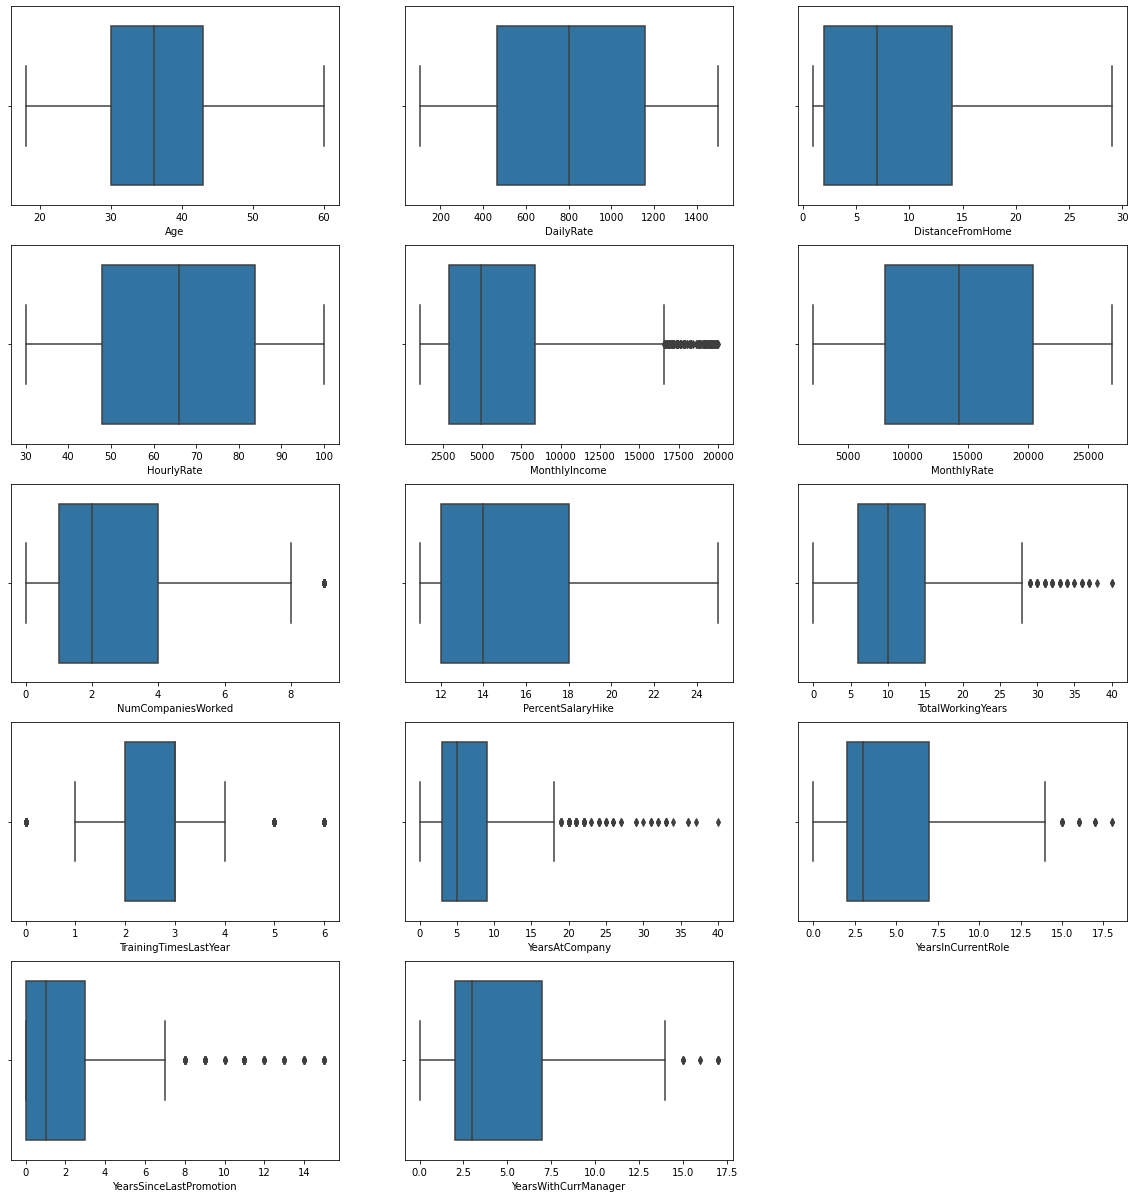

In [404]:
# rearange rows for more visibility
column_list = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
              'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
              'YearsSinceLastPromotion','YearsWithCurrManager']
fig = plt.figure(figsize=(20,30))
for i in range(len(column_list)):
    column = column_list[i]
    sub = fig.add_subplot(7,3, i+1)
    sns.boxplot(x=column, data=original_df)


In [405]:
original_df.loc[:,column_list].describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [406]:
"""
identified columns with outliers.
get the whisker values and remove rows that are outside the whiskers
IQR = Q3 - Q1
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
"""
clean_DF = original_df.copy()
outliers = ['MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
            'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in range(len(outliers)):
    outlier = outliers[i]
    temp = original_df[outlier].describe()
    Q1 = temp.iloc[4]
    Q3 = temp.iloc[6]
    IQR = Q3 - Q1
    min_whisker = Q1 - 1.5*IQR
    max_whisker = Q3 + 1.5*IQR
    clean_DF = original_df[original_df[outlier] > min_whisker]
    clean_DF = original_df[original_df[outlier] < max_whisker]
    
clean_DF.loc[:,column_list].describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,36.850275,804.364698,9.171016,65.970467,6448.967033,14329.802198,2.689560,15.218407,11.160027,2.799451,6.875000,4.172390,2.133242,4.007555
std,9.131696,403.496540,8.092439,20.318017,4659.294850,7106.859755,2.497515,3.656238,7.703157,1.292176,5.989065,3.569028,3.144640,3.382685
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2097.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2907.750000,8158.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.500000,805.000000,7.000000,66.000000,4903.500000,14269.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,84.000000,8197.750000,20463.250000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,14.000000


In [407]:
clean_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1456 non-null   int64
 1   Attrition                 1456 non-null   int64
 2   BusinessTravel            1456 non-null   int64
 3   DailyRate                 1456 non-null   int64
 4   Department                1456 non-null   int64
 5   DistanceFromHome          1456 non-null   int64
 6   Education                 1456 non-null   int64
 7   EducationField            1456 non-null   int64
 8   EnvironmentSatisfaction   1456 non-null   int64
 9   Gender                    1456 non-null   int64
 10  HourlyRate                1456 non-null   int64
 11  JobInvolvement            1456 non-null   int64
 12  JobLevel                  1456 non-null   int64
 13  JobRole                   1456 non-null   int64
 14  JobSatisfaction           1456 non-null 

In [408]:
"""
Part 3
Feature selection. Use graphs, ANOVA test, Chi-squared test to reduce the dimension. 
Any variables with zero to little variance?  
Any features Irrelevant to the target variable? 
Any high-correlated Features?
Feature scaling. Does this algorithm require normalized data or standardized data?
Are there any categorical variables need to be changed to dummy variables?
"""


'\nPart 3\nFeature selection. Use graphs, ANOVA test, Chi-squared test to reduce the dimension. \nAny variables with zero to little variance?  \nAny features Irrelevant to the target variable? \nAny high-correlated Features?\nFeature scaling. Does this algorithm require normalized data or standardized data?\nAre there any categorical variables need to be changed to dummy variables?\n'

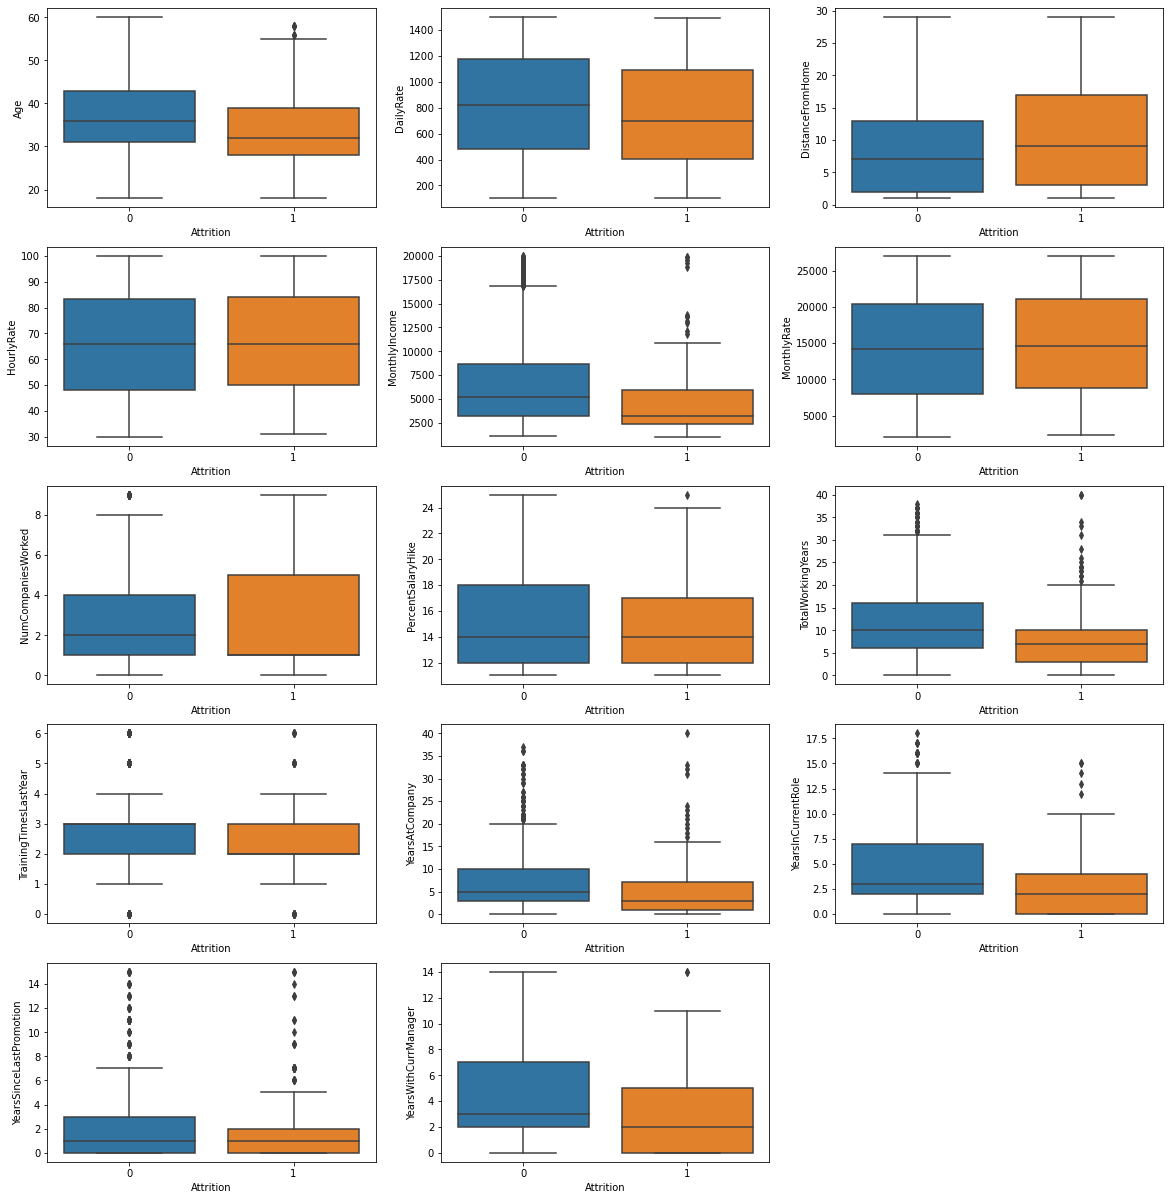

In [409]:
#using boxplot to check variance of numerics
column_list = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
              'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
              'YearsSinceLastPromotion','YearsWithCurrManager']
fig=plt.figure(figsize=(20, 30))

for i in range(len(column_list)):
    column=column_list[i]
    sub=fig.add_subplot(7,3,i+1)
    sns.boxplot(x='Attrition',y=column, data=clean_DF)


In [410]:
#ANOVA for numeric data
column_list = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
              'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
              'YearsSinceLastPromotion','YearsWithCurrManager']
x = clean_DF.loc[:, column_list]
y = clean_DF.loc[:, 'Attrition']

fs = SelectKBest(score_func=f_classif, k='all')
FeaturesS = fs.fit(x, y)
np.set_printoptions(suppress = True)
print(FeaturesS.scores_)
print(FeaturesS.pvalues_)


[36.56789844  5.08464705  9.29067024  0.10780586 36.90183624  0.29507164
  2.87122573  0.31173397 41.67836814  5.20574899 24.39536245 36.69041459
  1.01278692 33.75925213]
[0.         0.02428682 0.00234478 0.74270337 0.         0.58707195
 0.09039031 0.57670406 0.         0.02265631 0.00000088 0.
 0.31440355 0.00000001]


In [411]:
#drop everything with pvalue higher then 0.05 as not significant
to_drop = ['HourlyRate','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','YearsSinceLastPromotion']
updated_df = clean_DF.drop(to_drop, axis = 1)

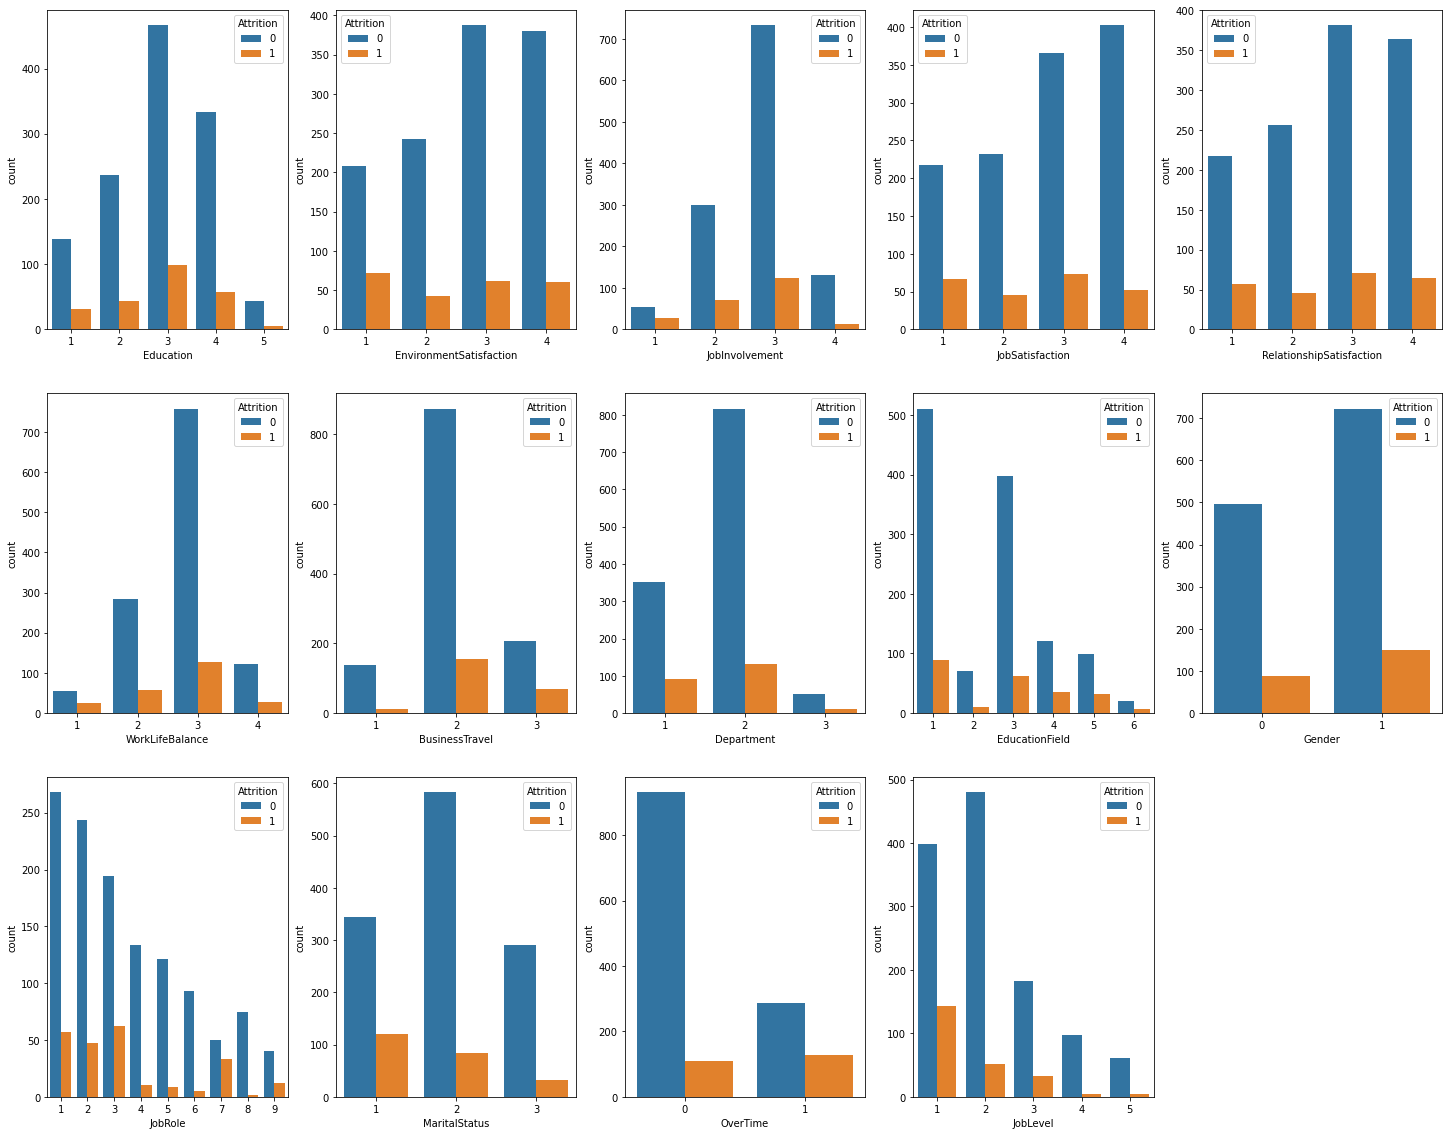

In [412]:
# Categorical Features vs. Target -  Grouped Bar Chart
cat_list=['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','RelationshipSatisfaction',
          'WorkLifeBalance','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
          'OverTime','JobLevel']
fig=plt.figure(figsize=(25,20))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(3,5,i+1)
    chart=sns.countplot(x=column, hue='Attrition', data=updated_df)

In [413]:
#chi-squared
cat_list=['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','RelationshipSatisfaction',
          'WorkLifeBalance','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
          'OverTime','JobLevel']
x = updated_df.loc[:, cat_list]
y = updated_df.loc[:, 'Attrition']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)


[ 0.45416772  6.87199424  4.59161122  7.17395788  1.30278231  1.05445148
  3.18649799  0.95422299  6.95258116  0.52426861  1.45251795 10.86314748
 62.98353249 23.76420064]
[0.50036239 0.00875569 0.0321288  0.00739694 0.25370563 0.30448409
 0.07424891 0.3286467  0.00836984 0.46902647 0.22812436 0.00098097
 0.         0.00000109]


In [414]:
#drop columns with pvalue over 0.05 as not significant
to_drop = ['Education','RelationshipSatisfaction','WorkLifeBalance','BusinessTravel','Department',
          'Gender','JobRole']
updated_df = updated_df.drop(to_drop, axis = 1)

In [415]:
updated_df

,Age,Attrition,DailyRate,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1102,1,1,2,3,2,4,1,5993,1,0,8,0,6,4,5
1,49,0,279,8,1,3,2,2,2,2,5130,0,1,10,3,10,7,7
2,37,1,1373,2,2,4,2,1,3,1,2090,1,0,7,3,0,0,0
3,33,0,1392,3,1,4,3,1,3,2,2909,1,0,8,3,8,7,0
4,27,0,591,2,3,1,3,1,2,2,3468,0,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,3,3,4,2,4,2,2571,0,1,17,3,5,2,3
1466,39,0,613,6,3,4,2,3,1,2,9991,0,1,9,5,7,7,7
1467,27,0,155,4,1,2,4,2,2,2,6142,1,1,6,0,6,2,3
1468,49,0,1023,2,3,4,2,2,2,2,5390,0,0,17,3,9,6,8


In [416]:
#dataframe with just target and numeric values
updated_numeric_df = updated_df[['Age','Attrition','DailyRate','DistanceFromHome','MonthlyIncome','StockOptionLevel',
            'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
                                 'YearsWithCurrManager']].copy()

In [417]:
#our_df = updated_df.copy()
our_df = updated_numeric_df.copy()


In [418]:
#splitting data for training stratify so we can deal with imbalance of data
x = our_df.loc[:, our_df.columns!='Attrition']
y = our_df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)


In [419]:
#using oversampling to deal with imbalanced data
os = SMOTE(random_state=0)
oversampled_x,oversampled_y=os.fit_sample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)

(1164, 10)
(1950, 10)


In [420]:
#seeing accuracy of log regression

LogRegression = LogisticRegression(penalty='none', max_iter=5000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())
test_pred = LogRegression.predict(x_test)
accuracy_score(y_test, test_pred)


0.6027397260273972

In [421]:
#how many neighbors do we want to test for accuracy only 2 classes, quit or stay so mod3 to avoid ties
k_values = []
for i in range(1, 50):
    if i%2 !=0:
        k_values.append(i)
print(k_values)


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [422]:
#normalizing data
column_list = ['Age','DailyRate','DistanceFromHome','MonthlyIncome','StockOptionLevel',
            'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
#only using numerical data here
x_final = updated_df.loc[:, column_list]

nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final)    


In [423]:
#10 fold
k_accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean()) 


df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy']) 

print(df_k_scores.sort_values(by='accuracy', ascending=False))


       k  accuracy
8   17.0  0.846835
5   11.0  0.844095
13  27.0  0.843396
12  25.0  0.843387
10  21.0  0.843387
9   19.0  0.843387
11  23.0  0.842707
19  39.0  0.842036
7   15.0  0.842031
14  29.0  0.841351
16  33.0  0.840666
20  41.0  0.840661
17  35.0  0.840661
18  37.0  0.840657
15  31.0  0.839972
22  45.0  0.839296
23  47.0  0.839296
6   13.0  0.839277
24  49.0  0.838607
21  43.0  0.838602
4    9.0  0.836538
3    7.0  0.829674
2    5.0  0.823486
1    3.0  0.813850
0    1.0  0.758233


In [424]:
#k=17 highest accuracy so based off 21 neighbors gives most accurate prediction